# 第3章 現象を説明・予測する統計モデルを作りたい(1) <br> ----重回帰分析

今回から回帰が入ってきてかっこよくなってくる。\
前回から、データをDataFrameに入れたとき、本のままの変数名にするか、df_nameのようにするかごちゃごちゃだった。\
今回から統一的に、df_本での変数名、で行こうと思う。

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

今回は、sklearnかscipy.statsを使いそうだが、今のところおいとく

## データと手法の概要

### データの概要 

### 分析の目的と概要

## モデルの作成と母数の推定・診断

### モデルの作成と母数の推定 

In [2]:
df_csdat = pd.read_csv("../data/第03章/顧客満足度データ.csv", encoding="shift-jis")

In [3]:
df_csdat[:3]

,店舗番号,顧客数,立地満足度,設備満足度,店舗面積満足度,トレーナー満足度,トレーナー数,接客研修,入会特典
0,1,595,4.2,5.4,5.9,6.8,12,0,1
1,2,483,4.7,4.1,3.6,6.1,11,0,0
2,3,601,7.5,6.3,5.5,5.6,11,1,0


In [4]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [5]:
y = df_csdat.顧客数
X = df_csdat[ ["立地満足度","設備満足度", "店舗面積満足度", "トレーナー満足度"] ]

In [6]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
lm.coef_

array([29.10529033, 21.63967779, 23.80296014, 32.42134205])

In [8]:
lm.intercept_

-35.20448824889132

sklearnだと各種の係数の統計量が見れないので、StatsModelを用いる

In [9]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [10]:
model = ols(formula="顧客数 ~ 立地満足度+設備満足度+店舗面積満足度+トレーナー満足度", data=df_csdat)
res1 = model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     29.43
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           3.96e-09
Time:                        23:24:01   Log-Likelihood:                -154.11
No. Observations:                  30   AIC:                             318.2
Df Residuals:                      25   BIC:                             325.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.2045     50.659     -0.695      0.494    -139.538      69.129
立地満足度         29.1053      5.684      5.120      0.000      17.398      40.812
設備満足度         21.6397      7.036      3.076      0.005       7.149      36.130
店舗面積満足度       23.8030      6.971      3.414      0.002       9.445      38.161
トレーナー満足度      32.4213      5.608      5.781      0.000      20.872      43.971
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.479
Skew:                           0.533   Prob(JB):                        0.477
Kurtosis:                       2.780   Cond. No.                         63.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

書き方は~使うあたりRなんかに似てる。答えも大体一致している。\
また、Rの結果には出ていない、AIC, BIC(のちに出る)物なども表示していてよい感じ。\
statsmodelは一般線形化モデルなどさまざまなものができるらしい。初めて知った。\


### 推定結果の診断---多重共線性のチェック 

相関係数を見る。pythonだとseabornのheatmapがよく使われるので一応やってみる。

In [11]:
import seaborn as sns
import japanize_matplotlib

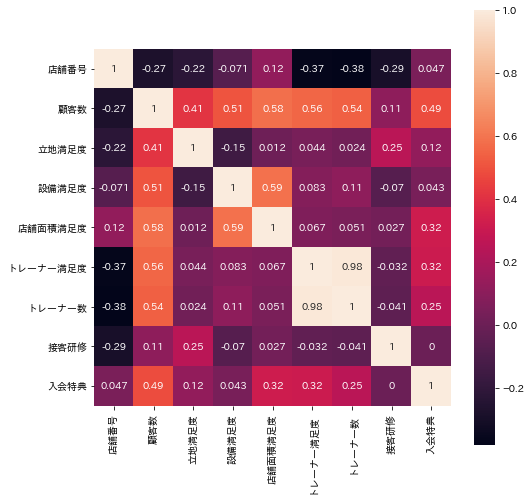

In [12]:
plt.figure(figsize = (8,8))
corr_mat = df_csdat.corr()
sns.heatmap(corr_mat,
           annot=True,
           square=True,
            )

In [13]:
df_csdat[["トレーナー満足度", "トレーナー数"]].corr()

,トレーナー満足度,トレーナー数
トレーナー満足度,1.000000,0.984321
トレーナー数,0.984321,1.000000


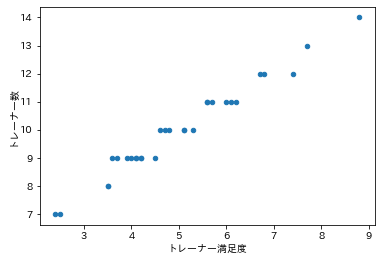

In [14]:
df_csdat.plot.scatter("トレーナー満足度", "トレーナー数")

In [15]:
model1 = ols(formula="顧客数 ~ トレーナー満足度", data=df_csdat)
resm1 = model1.fit()
resm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     12.56
Date:                Fri, 13 Mar 2020   Prob (F-statistic):            0.00141
Time:                        23:24:02   Log-Likelihood:                -174.68
No. Observations:                  30   AIC:                             353.4
Df Residuals:                      28   BIC:                             356.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    314.0432     54.686      5.743      0.000     202.023     426.063
トレーナー満足度      37.0858     10.464      3.544      0.001      15.652      58.520
==============================================================================
Omnibus:                        1.948   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.052
Skew:                           0.443   Prob(JB):                        0.591
Kurtosis:                       3.240   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
model2 = ols(formula="顧客数 ~ トレーナー満足度+トレーナー数", data=df_csdat)
resm2 = model1.fit()
resm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     12.56
Date:                Fri, 13 Mar 2020   Prob (F-statistic):            0.00141
Time:                        23:24:02   Log-Likelihood:                -174.68
No. Observations:                  30   AIC:                             353.4
Df Residuals:                      28   BIC:                             356.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    314.0432     54.686      5.743      0.000     202.023     426.063
トレーナー満足度      37.0858     10.464      3.544      0.001      15.652      58.520
==============================================================================
Omnibus:                        1.948   Durbin-Watson:                   2.397
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.052
Skew:                           0.443   Prob(JB):                        0.591
Kurtosis:                       3.240   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

多重共線性については、いかがわかりやすかった。\
https://qiita.com/fhiyo/items/6d4faa7c26d46022ac09

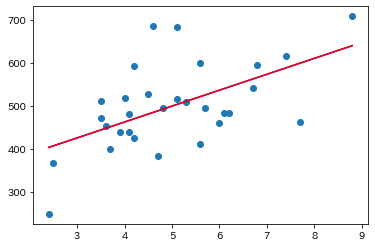

In [17]:
plt.scatter(df_csdat["トレーナー満足度"], df_csdat["顧客数"])
plt.plot((df_csdat["トレーナー満足度"].min(), df_csdat["トレーナー満足度"].max()), (resm1.predict().min(), resm1.predict().max()), label="resm1", color = "blue")
plt.plot((df_csdat["トレーナー満足度"].min(), df_csdat["トレーナー満足度"].max()), (resm2.predict().min(), resm2.predict().max()), label="resm2", color = "red")

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 

In [19]:
data_x = df_csdat[["トレーナー満足度", "トレーナー数"]]

In [20]:
vifs2 = [variance_inflation_factor(model2.exog, i) for i in range(1,model2.exog.shape[1])]

In [21]:
vifs2

[32.14226120710297, 32.14226120710297]

In [22]:
vifs = [variance_inflation_factor(model.exog, i) for i in range(1,model.exog.shape[1])]
vifs

[1.0421063305308444, 1.5899376559013119, 1.548751689526127, 1.0104552735732493]

## モデルの評価と解釈

### 決定係数によるモデル全体の評価 

###  切片と偏回帰係数の解釈

### 　単位の異なる説明変数が混在する場合う---標準偏回帰係数の算出

信頼区間は、それぞれsummuryを実行したときに、表示されている。\
本の結果は、resultに出ている。

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
ss = StandardScaler()

In [25]:
df_scsdat = pd.DataFrame( ss.fit_transform(df_csdat), columns=df_csdat.columns)

In [26]:
model2 = ols("顧客数 ~ 立地満足度 + トレーナー数", data = df_scsdat)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     11.25
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           0.000280
Time:                        23:24:02   Log-Likelihood:                -33.478
No. Observations:                  30   AIC:                             72.96
Df Residuals:                      27   BIC:                             77.16
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.498e-16      0.142   1.76e-15      1.000      -0.292       0.292
立地満足度          0.4020      0.142      2.828      0.009       0.110       0.694
トレーナー数         0.5317      0.142      3.739      0.001       0.240       0.823
==============================================================================
Omnibus:                        7.714   Durbin-Watson:                   2.202
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                6.464
Skew:                           0.781   Prob(JB):                       0.0395
Kurtosis:                       4.653   Cond. No.                         1.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 報告例 

## 質的変数を含む重回帰分析

### 分析例

In [27]:
model3 = ols("顧客数~立地満足度+設備満足度+店舗面積満足度+トレーナー満足度+接客研修+入会特典", df_csdat)
res3 =model3.fit()

res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     22.90
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           1.27e-08
Time:                        23:24:02   Log-Likelihood:                -151.11
No. Observations:                  30   AIC:                             316.2
Df Residuals:                      23   BIC:                             326.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.8780     48.906     -0.284      0.779    -115.048      87.292
立地満足度         27.4875      5.544      4.958      0.000      16.019      38.956
設備満足度         24.7446      6.779      3.650      0.001      10.721      38.768
店舗面積満足度       17.9633      7.067      2.542      0.018       3.345      32.582
トレーナー満足度      28.5150      5.592      5.099      0.000      16.947      40.083
接客研修           8.0142     16.121      0.497      0.624     -25.336      41.364
入会特典          40.1279     18.065      2.221      0.036       2.757      77.499
==============================================================================
Omnibus:                        1.983   Durbin-Watson:                   2.467
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                1.064
Skew:                           0.443   Prob(JB):                        0.587
Kurtosis:                       3.257   Cond. No.                         64.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


## AICとBICによるモデル評価

In [28]:
res1.aic, res3.aic

(318.21715022204046, 316.2114041852073)

In [29]:
res1.bic, res3.bic

(325.22313713035123, 326.0197858568424)

結果は本とは異なるが、差が等しくなる結果になった。\
定数項の考え方の差があるのかなと思った。

## 重回帰分析と母数推定理論

### 最小二乗法による母数推定の概要 

### 最尤法による母数推定の概要 

## 偏回帰係数の解釈

## 決定係数とその検定

## 切片と偏相関係数の検定

In [33]:
import scipy.stats as st

In [37]:
st.t.cdf(res1.tvalues.Intercept, df = 25)*2

0.49350552168447603

In [38]:
(1 - st.t.cdf(res1.tvalues.設備満足度, df = 25))*2

0.005030246354448709

## 切片と偏回帰係数の信頼区間

いろいろRではやっているが、statsmodelでは表示されている。

In [41]:
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    顧客数   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     29.43
Date:                Fri, 13 Mar 2020   Prob (F-statistic):           3.96e-09
Time:                        23:28:25   Log-Likelihood:                -154.11
No. Observations:                  30   AIC:                             318.2
Df Residuals:                      25   BIC:                             325.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.2045     50.659     -0.695      0.494    -139.538      69.129
立地満足度         29.1053      5.684      5.120      0.000      17.398      40.812
設備満足度         21.6397      7.036      3.076      0.005       7.149      36.130
店舗面積満足度       23.8030      6.971      3.414      0.002       9.445      38.161
トレーナー満足度      32.4213      5.608      5.781      0.000      20.872      43.971
==============================================================================
Omnibus:                        1.851   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.396   Jarque-Bera (JB):                1.479
Skew:                           0.533   Prob(JB):                        0.477
Kurtosis:                       2.780   Cond. No.                         63.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## VIFの理論